# AAN run check

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from nptdms import TdmsFile

In [ ]:
# 1) TDMS 파일 로드 & Available groups 출력
# file_path = '../data/250516_01.tdms'
# file_path = '../data/0529.tdms' # forgetting factor test
# file_path = '../data/aan.tdms' # just aan
file_path = '../../data/250611_JSH.tdms' 
tdms = TdmsFile.read(file_path)

print("✅ Available groups and channels:")
group_channel_map = {}
for grp in tdms.groups():
    name = grp.name
    channels = [ch.name for ch in grp.channels()]
    group_channel_map[name] = channels
    print(f" - Group: {name}")
    for ch in channels:
        print(f"    • {ch}")

FileNotFoundError: [Errno 2] No such file or directory: '../../data/250611_LJW.tdms'


▶ Using group: Datas


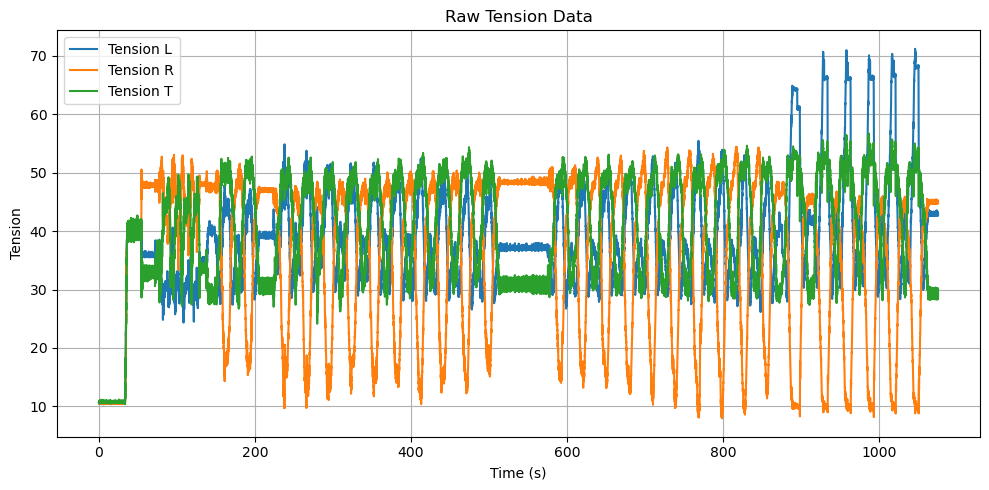

In [26]:
# 2) 사용할 그룹 선택
group = 'Datas' if 'Datas' in group_channel_map else list(group_channel_map.keys())[0]
print(f"\n▶ Using group: {group}")

# 3) 채널값 추출
ten_l = tdms[group]['Measured Tension L'][:]
ten_r = tdms[group]['Measured Tension R'][:]
ten_t = tdms[group]['Measured Tension T'][:]

# 4) 시간 축 생성 (sample_rate = 50 Hz)
time = np.arange(len(ten_l)) / 50

# 5) 시각화
plt.figure(figsize=(10,5))
plt.plot(time, ten_l, color='C0', label='Tension L')
plt.plot(time, ten_r, color='C1', label='Tension R')
plt.plot(time, ten_t, color='C2', label='Tension T')
plt.title('Raw Tension Data')
plt.xlabel('Time (s)')
plt.ylabel('Tension')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

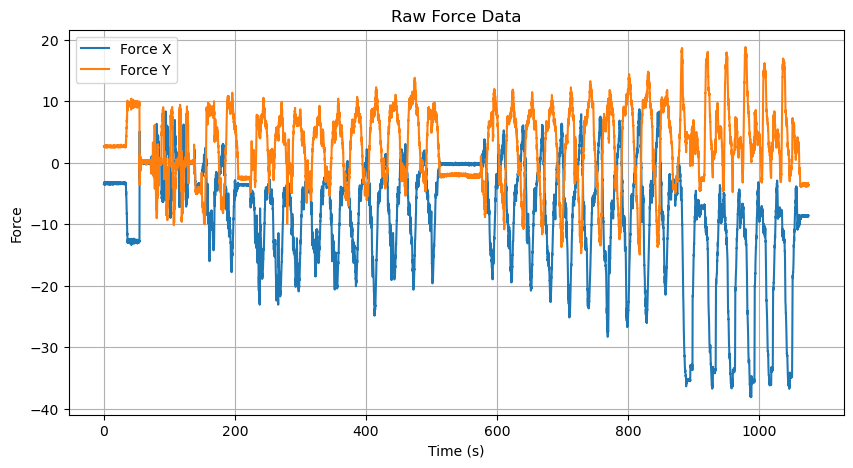

In [27]:
# 채널값 추출 (스케일 적용)
fx = tdms[group]['Force X'][:]
# fy = tdms[group]['Force y'][:]
fy = tdms[group]['Force Y'][:]
time = np.arange(len(fx)) / 50  # sample_rate=50

plt.figure(figsize=(10,5))
plt.plot(time, fx, color='C0', label='Force X')      # 파란색
plt.plot(time, fy, color='C1', label='Force Y')      # 주황색
plt.title('Raw Force Data')
plt.xlabel('Time (s)'); plt.ylabel('Force')
plt.legend(); plt.grid(True)
plt.show()


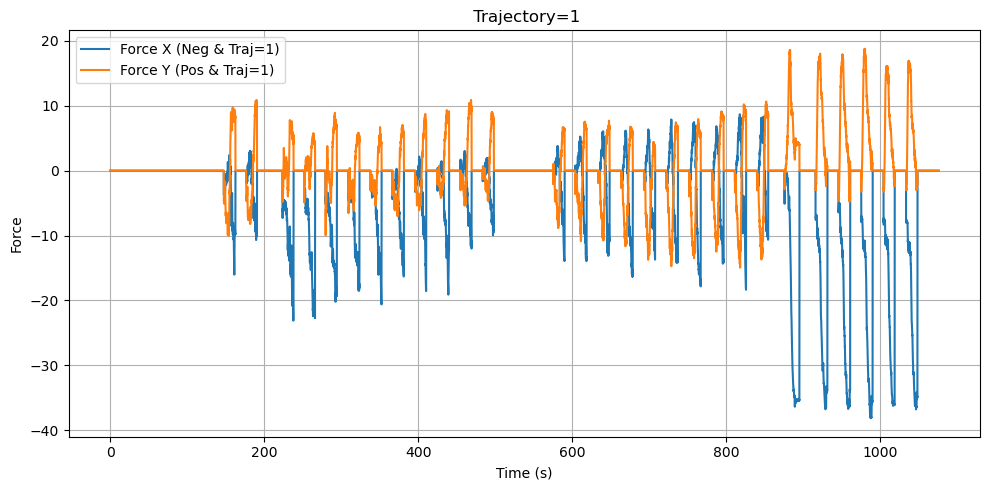

In [28]:
# 2) Force X<0, Force Y>0 필터링 & 시각화 (C0/C1 색상)
# fx_neg = np.where(fx < 0, fx, 0)
# fy_pos = np.where(fy > 0, fy, 0)

# plt.figure(figsize=(10,5))
# plt.plot(time, fx_neg, color='C0', label='Force X (Neg)')  # 파란색
# plt.plot(time, fy_pos, color='C1', label='Force Y (Pos)')  # 주황색
# plt.title('Filtered Force Data (X<0 → Keep, Y>0 → Keep)')
# plt.xlabel('Time (s)')
# plt.ylabel('Force')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# 3) #2에서 만든 fx_neg, fy_pos에 Trajectory=1 마스크 적용 & 시각화
traj = tdms[group]['Trajectory'][:]    # Trajectory 로드
mask = (traj == 1)                     # Traj=1 위치

# Traj=1 아닌 곳은 0으로 (혹은 np.nan으로 할 수도 있음)
# fx_neg_traj = np.where(mask, fx_neg, 0)
# fy_pos_traj = np.where(mask, fy_pos, 0)
fx_traj = np.where(mask, fx, 0)
fy_traj = np.where(mask, fy, 0)

# plt.figure(figsize=(10,5))
# plt.plot(time, fx_neg_traj, color='C0', label='Force X (Neg & Traj=1)')
# plt.plot(time, fy_pos_traj, color='C1', label='Force Y (Pos & Traj=1)')
# plt.title('Filtered Force Data (X<0, Y>0) & Trajectory=1')
# plt.xlabel('Time (s)')
# plt.ylabel('Force')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(10,5))
plt.plot(time, fx_traj, color='C0', label='Force X (Neg & Traj=1)')
plt.plot(time, fy_traj, color='C1', label='Force Y (Pos & Traj=1)')
plt.title(' Trajectory=1')
plt.xlabel('Time (s)')
plt.ylabel('Force')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# plt.figure(figsize=(10,3))
# plt.plot(time, traj, color='C2', label='Trajectory')
# plt.title('Trajectory over Time')
# plt.xlabel('Time (s)')
# plt.ylabel('Trajectory')
# plt.yticks([0, 1])
# plt.grid(True)
# plt.legend(loc='upper right')
# plt.tight_layout()
# plt.show()

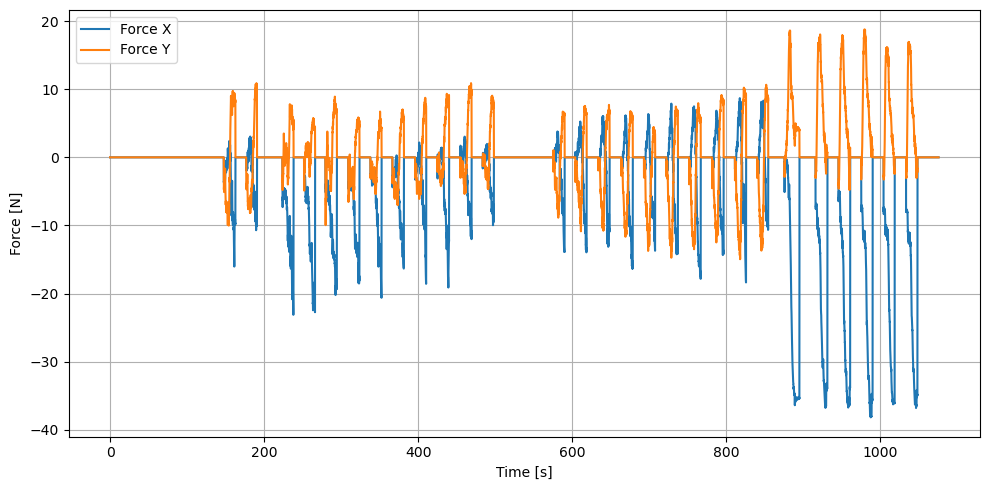

In [29]:
# 시작 시간과 샘플레이트 정의
start_time = 0  # 초
sample_rate = 50  # Hz
start_idx = int(start_time * sample_rate)

# Trajectory 및 마스크 정의 (자르기 전)
traj = tdms[group]['Trajectory'][:]
mask = (traj == 1)

# Force 데이터 자르기 전 처리
fx_traj = np.where(mask, fx, 0)
fy_traj = np.where(mask, fy, 0)

# 자르기

fx_traj_cut = fx_traj[start_idx:]
fy_traj_cut = fy_traj[start_idx:]

# 시간도 다시 정의
time_cut = np.arange(len(fx_traj_cut)) / sample_rate


# 두 번째 플롯
plt.figure(figsize=(10,5))
plt.plot(time_cut, fx_traj_cut, color='C0', label='Force X')
plt.plot(time_cut, fy_traj_cut, color='C1', label='Force Y')
# plt.title(f'Filtered Force Data (X & Y) & Trajectory=1 from {start_time}s')
plt.xlabel('Time [s]')
plt.ylabel('Force [N]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


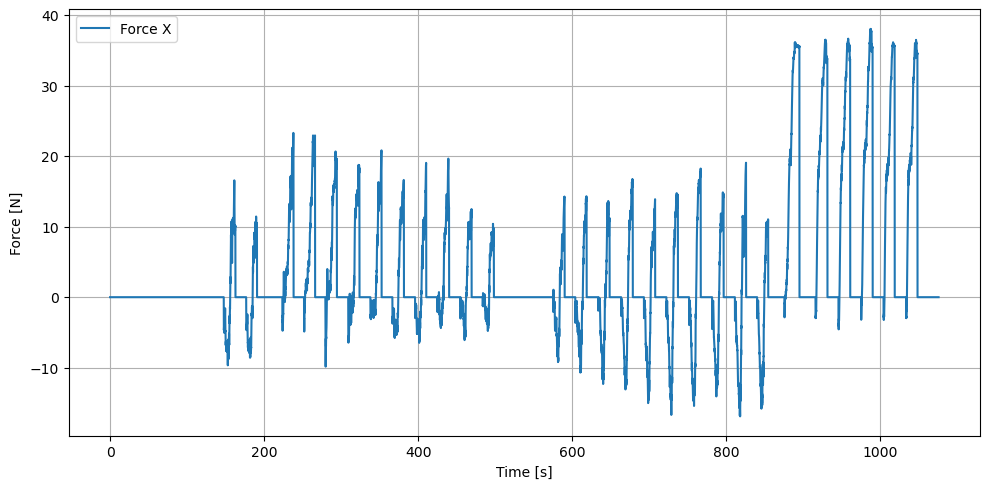

In [30]:
# 시작 시간과 샘플레이트 정의
start_time = 0  # 초
sample_rate = 50  # Hz
start_idx = int(start_time * sample_rate)

# Trajectory 및 마스크 정의 (자르기 전)
traj = tdms[group]['Trajectory'][:]
mask = (traj == 1)
# per = tdms[group]['Performance'][:]  # Per 채널 로드
per = tdms[group]['Projected Force'][:]  # Per 채널 로드
# Force 데이터 자르기 전 처리
fx_traj = np.where(mask, per, 0)

# 자르기

per_cut = fx_traj[start_idx:]

# 시간도 다시 정의
time_cut = np.arange(len(per_cut)) / sample_rate


# 두 번째 플롯
plt.figure(figsize=(10,5))
plt.plot(time_cut, per_cut, color='C0', label='Force X')
# plt.plot(time_cut, fy_traj_cut, color='C1', label='Force Y')
# plt.title(f'Filtered Force Data (X & Y) & Trajectory=1 from {start_time}s')
plt.xlabel('Time [s]')
plt.ylabel('Force [N]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


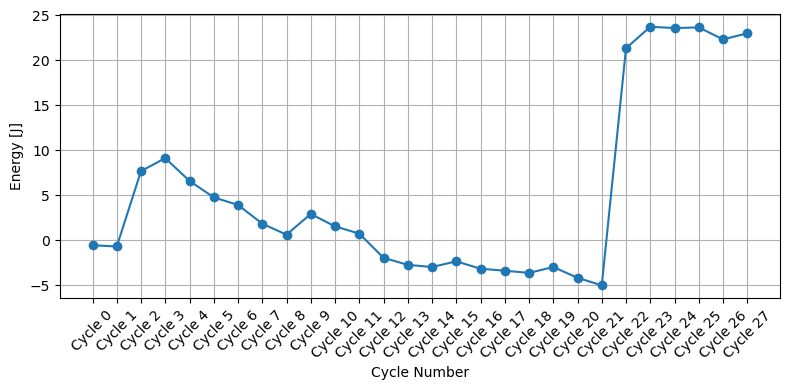

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# (1) 위치 데이터 로드 및 단위 변환
pos_x = tdms[group]['Measured Position X'][:]  # 위치 X
pos_y = tdms[group]['Measured Position Y'][:]  # 위치 Y

x = pos_x * 1e-3  
y = pos_y * 1e-3  

# (2) 위치 변화량
dx = np.diff(x, prepend=x[0])
dy = np.diff(y, prepend=y[0])

# # (3) Trajectory 및 힘 데이터 불러오기 (이미 불러왔다면 생략)
# traj = tdms[group]['Trajectory'][:]
# fx = tdms[group]['Force X'][:]
# fy = tdms[group]['Force Y'][:]

# (4) dE 계산
dE = fx * dx + fy * dy            # [J]
dE[traj == 0] = 0

# (5) falling edge 인덱스 구하기
edges = np.where((traj[:-1] == 1) & (traj[1:] == 0))[0] + 1

# (6) 사이클별 에너지 합산
energies = []
start = 0
for e in edges:
    energies.append(dE[start:e].sum())
    start = e

# (7) 사이클 15부터만 보고, x축은 0부터
start_cycle = 1  # 15번째 사이클부터
start_idx = start_cycle - 1       # 파이썬 인덱싱은 0부터 시작

energies_cut = energies[start_idx:]
cycle_nums_cut = list(range(len(energies_cut)))  # 0, 1, 2, ...

# (8) 플롯
plt.figure(figsize=(8,4))
plt.plot(cycle_nums_cut, energies_cut, marker='o', linestyle='-')
plt.xlabel('Cycle Number')
plt.ylabel('Energy [J]')
# plt.title('Energy per Trajectory=1 Cycle (from Cycle 15)')
plt.xticks(cycle_nums_cut, [f'Cycle {i}' for i in cycle_nums_cut], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Description

Ks = 
0.05, 3EA
0.1, 3EA
0.2, 3EA
0.4, 3EA
0.8, 3EA

AAN, 7EA
fgt, 7EA 

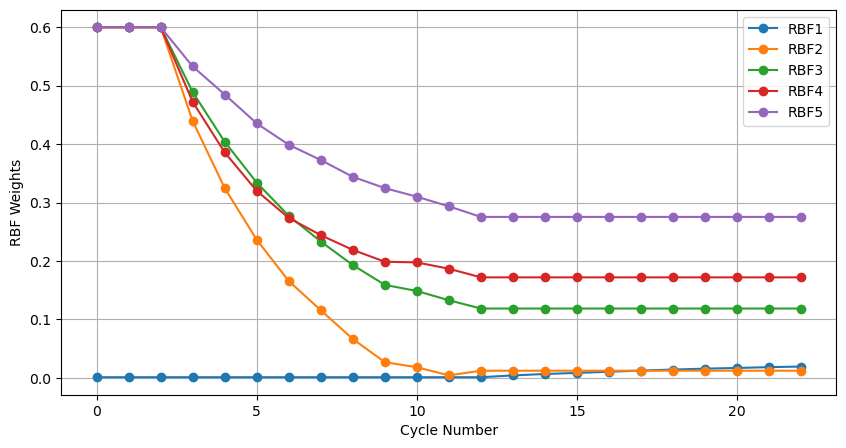

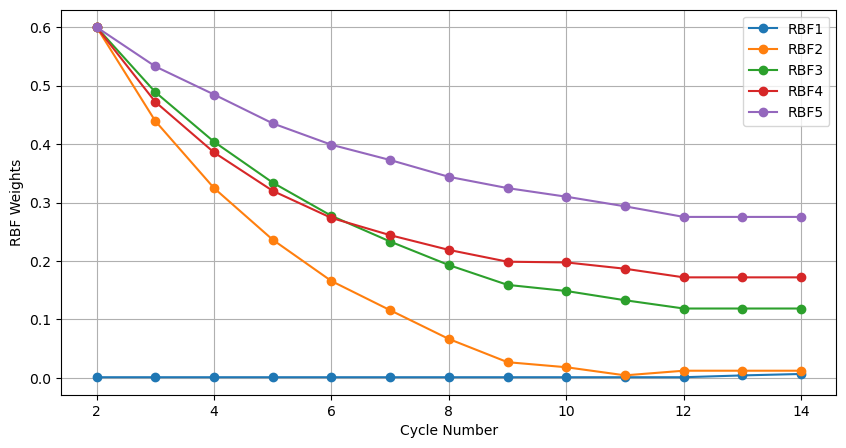

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# 2) RBF 채널 & Trajectory, 시간축
w1   = tdms[group]['Damp1'][:] 
w2   = tdms[group]['RBF2'][:]
w3   = tdms[group]['RBF3'][:]
w4   = tdms[group]['RBF4'][:]
w5   = tdms[group]['RBF5'][:]  # 필요시 사용
traj = tdms[group]['Trajectory'][:]
time = np.arange(len(w1)) / 50   # sample_rate = 50 Hz

# 3) Trajectory rising edge 인덱스 (0→1)
rising_idx = np.where((traj[:-1] == 0) & (traj[1:] == 1))[0] + 1

# 4) 600초 이후의 rising edge만
mask600 = time[rising_idx] <= 900
rising_idx = rising_idx[mask600]

# 5) 해당 시점의 RBF 값들
w1_rise = w1[rising_idx]
w2_rise = w2[rising_idx]
w3_rise = w3[rising_idx]
w4_rise = w4[rising_idx]  # 필요시 사용
w5_rise = w5[rising_idx]  # 필요시 사용

# 6) x축을 '사이클 번호(=rising edge 개수)'로
cycle_nums = np.arange(len(rising_idx))  # 0, 1, 2, ...

plt.figure(figsize=(10,5))
plt.plot(cycle_nums, w1_rise, '-o', color='C0', label='RBF1')
plt.plot(cycle_nums, w2_rise, '-o', color='C1', label='RBF2')
plt.plot(cycle_nums, w3_rise, '-o', color='C2', label='RBF3')
plt.plot(cycle_nums, w4_rise, '-o', color='C3', label='RBF4')  # 필요시 사용
plt.plot(cycle_nums, w5_rise, '-o', color='C4', label='RBF5')  # 필요시 사용

plt.xlabel('Cycle Number')
plt.ylabel('RBF Weights')
plt.legend()
plt.grid(True)
# plt.tight_layout()
plt.show()

cycle_nums = cycle_nums[-21:-8]
w1_rise = w1_rise[-21:-8]
w2_rise = w2_rise[-21:-8]
w3_rise = w3_rise[-21:-8]
w4_rise = w4_rise[-21:-8]
w5_rise = w5_rise[-21:-8]

plt.figure(figsize=(10,5))
plt.plot(cycle_nums, w1_rise, '-o', color='C0', label='RBF1')
plt.plot(cycle_nums, w2_rise, '-o', color='C1', label='RBF2')
plt.plot(cycle_nums, w3_rise, '-o', color='C2', label='RBF3')
plt.plot(cycle_nums, w4_rise, '-o', color='C3', label='RBF4')
plt.plot(cycle_nums, w5_rise, '-o', color='C4', label='RBF5')

plt.xlabel('Cycle Number')
plt.ylabel('RBF Weights')
plt.legend()
plt.grid(True)
plt.show()

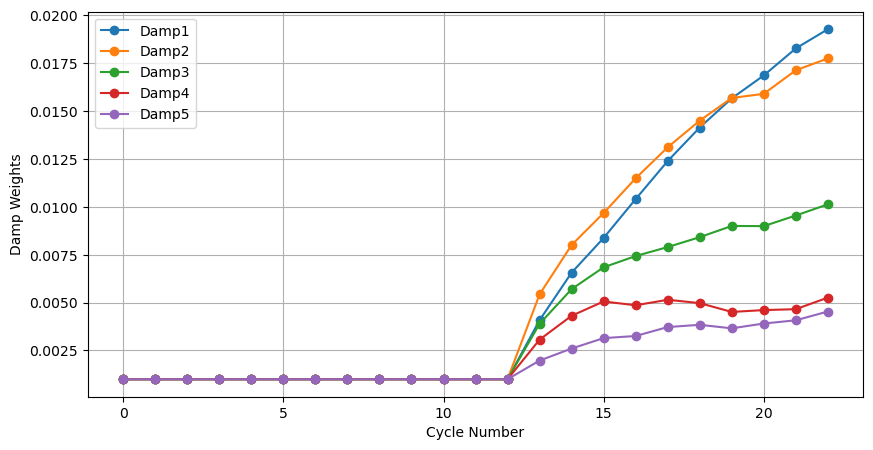

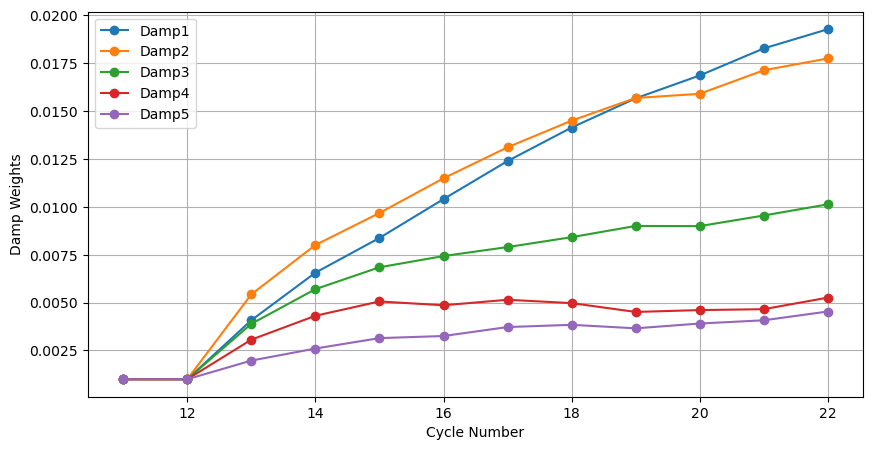

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# 2) RBF 채널 & Trajectory, 시간축
w1   = tdms[group]['Damp1'][:] 
w2   = tdms[group]['Damp2'][:]
w3   = tdms[group]['Damp3'][:]
w4   = tdms[group]['Damp4'][:]
w5   = tdms[group]['Damp5'][:]  # 필요시 사용
traj = tdms[group]['Trajectory'][:]
time = np.arange(len(w1)) / 50   # sample_rate = 50 Hz

# 3) Trajectory rising edge 인덱스 (0→1)
rising_idx = np.where((traj[:-1] == 0) & (traj[1:] == 1))[0] + 1

# 4) 600초 이후의 rising edge만
mask600 = time[rising_idx] <= 900
rising_idx = rising_idx[mask600]

# 5) 해당 시점의 RBF 값들
w1_rise = w1[rising_idx]
w2_rise = w2[rising_idx]
w3_rise = w3[rising_idx]
w4_rise = w4[rising_idx]  # 필요시 사용
w5_rise = w5[rising_idx]  # 필요시 사용

# 6) x축을 '사이클 번호(=rising edge 개수)'로
cycle_nums = np.arange(len(rising_idx))  # 0, 1, 2, ...

plt.figure(figsize=(10,5))
plt.plot(cycle_nums, w1_rise, '-o', color='C0', label='Damp1')
plt.plot(cycle_nums, w2_rise, '-o', color='C1', label='Damp2')
plt.plot(cycle_nums, w3_rise, '-o', color='C2', label='Damp3')
plt.plot(cycle_nums, w4_rise, '-o', color='C3', label='Damp4')  # 필요시 사용
plt.plot(cycle_nums, w5_rise, '-o', color='C4', label='Damp5')  # 필요시 사용

plt.xlabel('Cycle Number')
plt.ylabel('Damp Weights')
plt.legend()
plt.grid(True)
# plt.tight_layout()
plt.show()

cycle_nums = cycle_nums[-12:]
w1_rise = w1_rise[-12:]
w2_rise = w2_rise[-12:]
w3_rise = w3_rise[-12:]
w4_rise = w4_rise[-12:]
w5_rise = w5_rise[-12:]

plt.figure(figsize=(10,5))
plt.plot(cycle_nums, w1_rise, '-o', color='C0', label='Damp1')
plt.plot(cycle_nums, w2_rise, '-o', color='C1', label='Damp2')
plt.plot(cycle_nums, w3_rise, '-o', color='C2', label='Damp3')
plt.plot(cycle_nums, w4_rise, '-o', color='C3', label='Damp4')
plt.plot(cycle_nums, w5_rise, '-o', color='C4', label='Damp5')

plt.xlabel('Cycle Number')
plt.ylabel('Damp Weights')
plt.legend()
plt.grid(True)
plt.show()